###Import the Libraries

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


### Load the Dataset


In [ ]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

### EDA Steps

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:

df.shape


(100000, 9)

In [ ]:
df.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
 df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.describe(include = 'object')

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [ ]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

### Data Visualisation

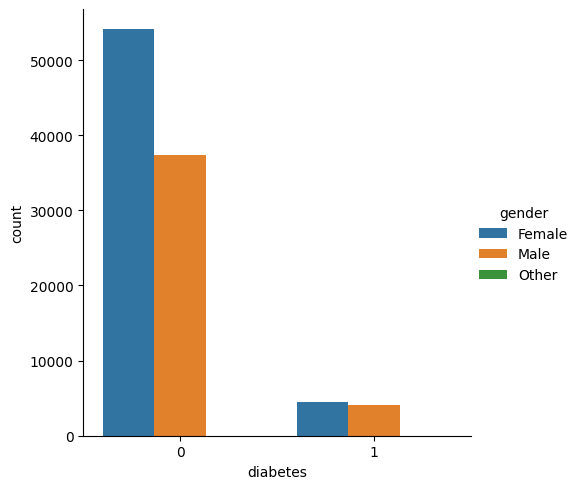

In [ ]:
import seaborn as sns
sns.catplot(x='diabetes',data=df, kind='count' ,hue='gender')

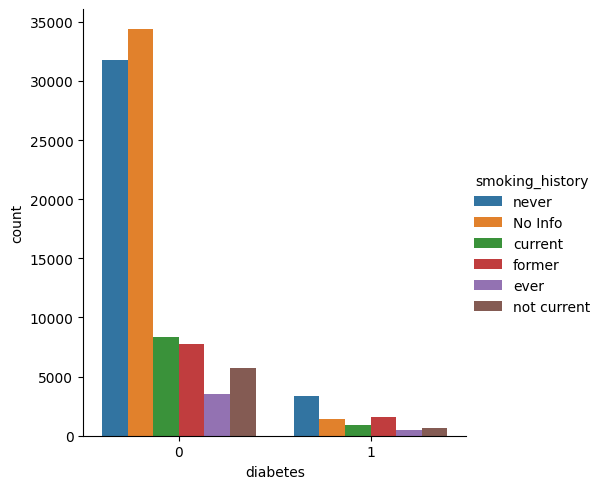

In [ ]:
sns.catplot(x='diabetes',data=df, kind='count' ,hue='smoking_history')

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['gender']= label_encoder.fit_transform(df['gender'])
df['gender'].unique()
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
 dict1 = {'never' :0,'No Info' :1,'current':2,'former':3,'ever':4,'not current':5}
 df['smoking_history'] = df['smoking_history'].map(dict1)
 df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown= "ignore")
ohe.fit_transform(df.smoking_history.values.reshape(-1,1)).toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

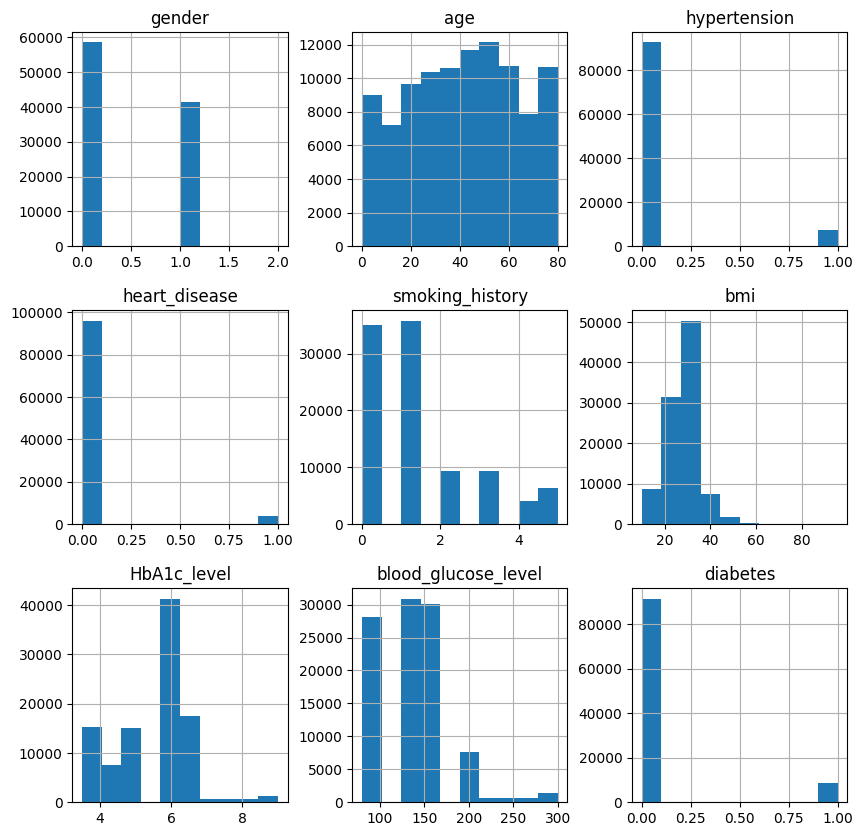

In [ ]:
df.hist(bins=10,figsize=(10,10))
plt.show()

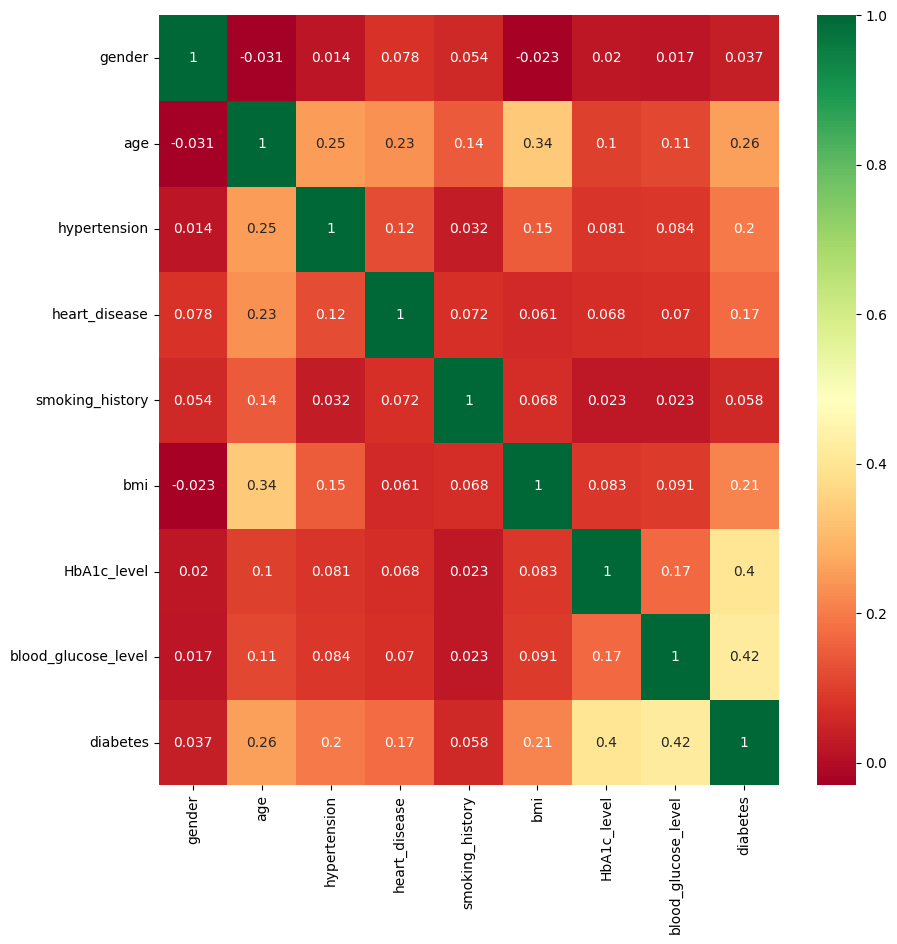

In [ ]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Split the datafram into X and Y

In [ ]:
target_name="diabetes"

y = df[target_name]

X = df.drop(target_name,axis=1)

In [ ]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,0,25.19,6.6,140
1,0,54.0,0,0,1,27.32,6.6,80
2,1,28.0,0,0,0,27.32,5.7,158
3,0,36.0,0,0,2,23.45,5.0,155
4,1,76.0,1,1,2,20.14,4.8,155


In [ ]:
y.sample(10)

58523    0
48990    0
11443    0
36284    0
79487    0
94113    0
98466    0
56606    0
25812    0
69891    0
Name: diabetes, dtype: int64

### Apply feature Scaling

In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-8.41046744e-01,  1.69270354e+00, -2.84439447e-01,
         4.93637859e+00, -8.98560145e-01, -3.21055792e-01,
         1.00170572e+00,  4.77042159e-02],
       [-8.41046744e-01,  5.38006427e-01, -2.84439447e-01,
        -2.02577655e-01, -2.11035645e-01, -1.15583678e-04,
         1.00170572e+00, -1.42620999e+00],
       [ 1.18723364e+00, -6.16690686e-01, -2.84439447e-01,
        -2.02577655e-01, -8.98560145e-01, -1.15583678e-04,
         1.61108022e-01,  4.89878478e-01],
       [-8.41046744e-01, -2.61399267e-01, -2.84439447e-01,
        -2.02577655e-01,  4.76488855e-01, -5.83232300e-01,
        -4.92690191e-01,  4.16182767e-01],
       [ 1.18723364e+00,  1.51505783e+00,  3.51568677e+00,
         4.93637859e+00,  4.76488855e-01, -1.08197037e+00,
        -6.79489680e-01,  4.16182767e-01]])

### Train Test and Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state=35)

In [ ]:
X_train.shape,y_train.shape
X_train = X_train.astype('int64')



In [ ]:
X_test.shape,y_test.shape
X_test = X_test.astype('int64')
X_test.dtype,y_test.dtype


(dtype('int64'), dtype('int64'))

### CLassification Algorithms

## KNN

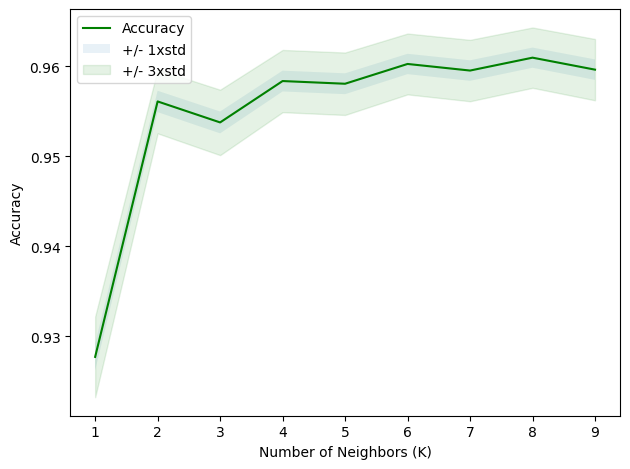

The best accuracy was with 0.9609666666666666 with k = 8


In [ ]:
from math import e
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range( 1,Ks):
      knn1 = KNeighborsClassifier(n_neighbors=n)
      knn1.fit(X_train,y_train)
      yhat = knn1.predict(X_test)
      mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
      std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])


plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1, Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color="green")
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

best_accuracy = mean_acc.max()
best_k = np.argmax(mean_acc) + 1
print("The best accuracy was with", best_accuracy, "with k =", best_k)


#### Parameter Tunning using Grid Search Cv

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

k_range = list(range(1,5))
weight_options = ['uniform', 'distance']
pow = [1, 2]

param_grid = dict(
    n_neighbors=k_range,
    weights=weight_options,
    p=pow
)

knn_gs = KNeighborsClassifier()
grid_k = GridSearchCV(knn_gs, param_grid, cv=10, scoring='accuracy')
grid_k.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print("Tuned Hyperparameters :", grid_k.best_params_)
print("Accuracy :",grid_k.best_score_)


Tuned Hyperparameters : {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
Accuracy : 0.9593857142857143


In [ ]:
knn1 = KNeighborsClassifier(n_neighbors= 20,p = 1,weights = 'uniform')
knn1.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=20, p=1)

In [ ]:
yhat = knn1.predict(X_test)
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
a1 = jaccard_score(y_test,yhat,pos_label=1)
b1 = f1_score(y_test, yhat, average='weighted')
c1 = accuracy_score(y_test, yhat)
print(' The jaccard_score of the KNN for k = 15 classifier on train data is {:.2f}'.format(a1))
print('The F1-score of the KNN for k = 15 classifier on train data is {:.2f}'.format(b1))
print('The Accuracy_score of the KNN for k = 15 classifier on train data is {:.2f}'.format(c1))


 The jaccard_score of the KNN for k = 15 classifier on train data is 0.54
The F1-score of the KNN for k = 15 classifier on train data is 0.96
The Accuracy_score of the KNN for k = 15 classifier on train data is 0.96


## Decision Tree

#### Parameter Tunning For Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {'criterion' :['gini', 'entropy'],
                        'max_features': ['auto', 'sqrt', 'log2'],
                        'ccp_alpha': [0.1, .01, .001],
                        'max_depth' : [5, 6, 7, 8, 9],
                        }
tree_clas = DecisionTreeClassifier(random_state=35)
grid_search = GridSearchCV(estimator=tree_clas,param_grid=param_grid,cv=5,verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=35),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

#### Find Best Parameters

In [ ]:
print("Tuned Hyperparameters :", grid_search.best_params_)
print("Accuracy :",grid_search.best_score_)


Tuned Hyperparameters : {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2'}
Accuracy : 0.9602857142857143


#### Train Best Model using Training

In [ ]:
Loan_Tree = grid_search.best_estimator_
print(Loan_Tree)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=7,
                       max_features='log2', random_state=35)


In [ ]:
Loan_Tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=7,
                       max_features='log2', random_state=35)

In [ ]:
predTree = Loan_Tree.predict(X_test)
a2 = jaccard_score(y_test, predTree,pos_label=1)
b2 = f1_score(y_test, predTree, average='weighted')
c2 = accuracy_score(y_test, predTree)
print("The accuraccy of DecisionTrees's {:.2f} ".
format(c2))
print('The jaccard_score of the DecisionTrees classifier is {:.2f}'.
format(a2))
print('The F1-score of the DecisionTrees classifier is {:.2f}'.
format(b2))


The accuraccy of DecisionTrees's 0.96 
The jaccard_score of the DecisionTrees classifier is 0.55
The F1-score of the DecisionTrees classifier is 0.96


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {
           'penalty' :  ['l1','l2'],
            'C'          : np.logspace(-3,3,7),
            'solver'  : ['newton-cg','lbfgs','liblinear'],
}
logreg = LogisticRegression()
clf = GridSearchCV(logreg,param_grid = parameters,scoring='accuracy',cv=10)
clf.fit(X_train,y_train)

NameError: ignored

In [ ]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy: ",clf.best_score_)

Tuned Hyperparameters : {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy:  0.9579571428571428


In [ ]:
log_reg = clf.best_estimator_
log_reg.fit(X_train,y_train)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [ ]:
yhat_1 = log_reg.predict(X_test)
a3 = jaccard_score(y_test,yhat_1,pos_label=1)
b3 = f1_score(y_test, yhat_1, average='weighted')
c3 = accuracy_score(y_test, yhat_1)
print(' The jaccard_score of the LR on train data is {:.2f}'.format(a3))
print('The F1-score of the LR   on train data is {:.2f}'.format(b3))
print('The Accuracy_score of the LR on train data is {:.2f}'.format(c3))


 The jaccard_score of the LR on train data is 0.53
The F1-score of the LR   on train data is 0.95
The Accuracy_score of the LR on train data is 0.96


## Support Vector Machine


In [ ]:
from sklearn.svm import SVC
param_grid = {'C': [1],'gamma': [10],
              'kernel': ['rbf']}
grid_s = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid_s.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=  48.5s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=  43.1s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=  47.4s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=  39.2s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=  49.0s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1], 'gamma': [10], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print("Tuned Hyperparameters :", grid_s.best_params_)
print("Accuracy :",grid_s.best_score_)


Tuned Hyperparameters : {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
Accuracy : 0.9530285714285714


In [ ]:
from sklearn.svm import SVC
svm = SVC(probability=True,C=0.1, gamma=1, kernel='sigmoid')
svm.fit(X_train, y_train)
print(svm)

SVC(C=0.1, gamma=1, kernel='sigmoid', probability=True)


In [ ]:
yhat_s = svm.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the dataset

# Define the parameter grid for tuning
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

naive_bayes = GaussianNB()
grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

# Use the best estimator to make predictions on the test set
best_naive_bayes = grid_search.best_estimator_
y_pred = best_naive_bayes.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Best Parameters:  {'var_smoothing': 1e-09}
Best Score:  0.9087
Accuracy:  0.9040333333333334


In [ ]:
naive_bayes = GaussianNB()

# Fit the classifier to the training data
naive_bayes.fit(X_train, y_train)


GaussianNB()

In [ ]:
yhat_2= naive_bayes.predict(X_test)

# Calculate Jaccard score
a4 = jaccard_score(y_test, yhat_2, pos_label=0)

# Calculate F1-score
b4 = f1_score(y_test, yhat_2, average='weighted')

# Calculate accuracy
c4 = accuracy_score(y_test, yhat_2)

# Print the results
print('The Jaccard score of the Naive Bayes on test data is {:.2f}'.format(a4))
print('The F1-score of the Naive Bayes on test data is {:.2f}'.format(b4))
print('The Accuracy score of the Naive Bayes on test data is {:.2f}'.format(c4))

The Jaccard score of the Naive Bayes on test data is 0.90
The F1-score of the Naive Bayes on test data is 0.91
The Accuracy score of the Naive Bayes on test data is 0.90


### Model Evaluation

In [ ]:
result_df = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree', 'Logistic Regression', 'Naive Bayes'],
    'Jaccard Score': [a1, a2, a3, a4],
    'F1 Score': [b1, b2, b3, b4],
    'Accuracy Score': [c1, c2, c3, c4]
})

print(result_df)

                 Model  Jaccard Score  F1 Score  Accuracy Score
0                  KNN       0.542009  0.956175        0.960933
1        Decision Tree       0.548285  0.957043        0.961800
2  Logistic Regression       0.525862  0.953468        0.957833
3          Naive Bayes       0.898171  0.913075        0.904033


### Use K-Fold Cross Validation

KNN: 0.908557 (0.002907)
DT: 0.908557 (0.002907)
LR: 0.908557 (0.002907)
Naive Bayes: 0.908557 (0.002907)


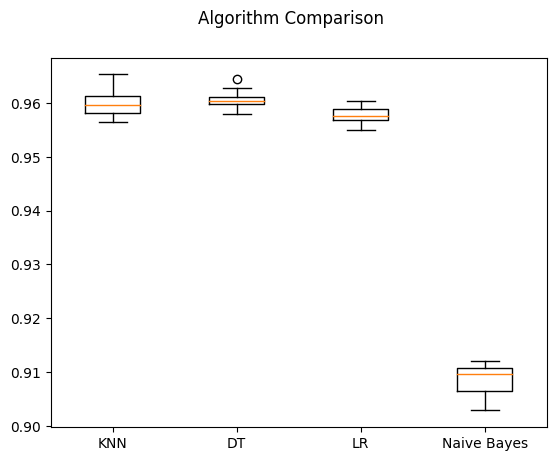

In [ ]:
from sklearn import model_selection
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', knn1))
models.append(('DT', Loan_Tree ))
#models.append(('SVM', svm))
models.append(('LR', log_reg))
models.append(('Naive Bayes', naive_bayes))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name,model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
for name,model in models:
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Ploting ROC_AUC Curce

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classifiers and make a list
classifiers = [knn1, Loan_Tree, log_reg, naive_bayes]
model_names = ['KNN', 'Decision Tree', 'Logistic Regression', 'Naive Bayes']

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['fpr', 'tpr', 'auc'])

# Train the models and record the results
for cls, model_name in zip(classifiers, model_names):
    model = cls.fit(X_train, y_train)
    y_probas = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probas)
    auc = roc_auc_score(y_test, y_probas)
    result_table = result_table.append({'fpr': fpr, 'tpr': tpr, 'auc': auc}, ignore_index=True)

# Set the names of the classifiers as index labels
result_table.index = model_names

print(result_table)


<ipython-input-69-fb5debaa1918>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'fpr': fpr, 'tpr': tpr, 'auc': auc}, ignore_index=True)
<ipython-input-69-fb5debaa1918>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'fpr': fpr, 'tpr': tpr, 'auc': auc}, ignore_index=True)
<ipython-input-69-fb5debaa1918>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'fpr': fpr, 'tpr': tpr, 'auc': auc}, ignore_index=True)


                                                                   fpr  \
KNN                  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.6350418029807...   
Decision Tree        [0.0, 0.0, 0.0006179571065067248, 0.0017084696...   
Logistic Regression  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Naive Bayes          [0.0, 7.270083605961468e-05, 7.270083605961468...   

                                                                   tpr  \
KNN                  [0.0, 0.3618473895582329, 0.40080321285140563,...   
Decision Tree        [0.0, 0.4951807228915663, 0.52570281124498, 0....   
Logistic Regression  [0.0, 0.00040160642570281126, 0.00120481927710...   
Naive Bayes          [0.0, 0.020080321285140562, 0.0220883534136546...   

                          auc  
KNN                  0.911983  
Decision Tree        0.923816  
Logistic Regression  0.940892  
Naive Bayes          0.901144  


<ipython-input-69-fb5debaa1918>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'fpr': fpr, 'tpr': tpr, 'auc': auc}, ignore_index=True)


### Plot Figure

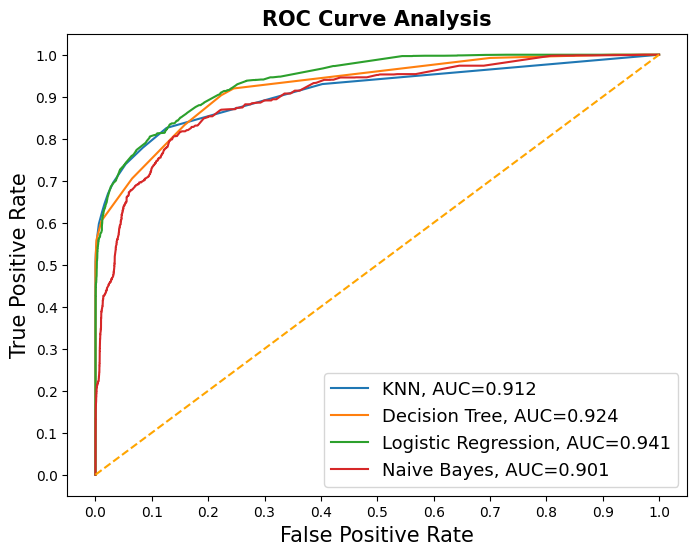

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8, 6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], result_table.loc[i]['tpr'], label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')
plt.show()

##  Saving Logistic Regression as it has Highest accuracy


In [ ]:
import joblib

# Save the trained Logistic Regression model
model_filename = 'logistic_regression_model.pkl'
joblib.dump(log_reg, model_filename)
print(f"Logistic Regression model saved as {model_filename}")

# Save X_test and y_test data (optional, if needed for future evaluation)
test_data_filename = 'test_data.pkl'
joblib.dump((X_test, y_test), test_data_filename)
print(f"Test data saved as {test_data_filename}")

NameError: ignored

In [ ]:
# Load the saved Logistic Regression model
loaded_log_reg = joblib.load(model_filename)

# Load the saved test data (optional)
loaded_X_test, loaded_y_test = joblib.load(test_data_filename)

In [ ]:
from google.colab import files
files.download(model_filename)